In [34]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Dropout
from keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os, datetime
from sklearn import metrics
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('coords4.csv')
for i in list(df['class'].unique()):
    print(i, len(df[df['class']==i]))

a 207
b 201
c 200
d 208
e 213
f 201
g 209
h 211
i 202
j 209
k 222
l 210
m 213
n 211
o 206
p 205
q 204
r 212
s 224
t 212
u 220
v 221
w 204
x 232
y 255
z 237


In [12]:
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,a,0.300754,0.953779,-1.611118e-07,0.0,0.418001,0.931192,-0.011599,0.0,0.506635,...,-0.064659,0.0,0.328625,0.574582,-0.047942,0.0,0.325279,0.631790,-0.030373,0.0
1,a,0.368056,0.780531,-5.756525e-07,0.0,0.482163,0.728122,-0.030138,0.0,0.560704,...,-0.051991,0.0,0.383020,0.505697,-0.038884,0.0,0.377364,0.542915,-0.020753,0.0
2,a,0.400332,0.737481,-5.432689e-07,0.0,0.514085,0.707118,-0.024144,0.0,0.594843,...,-0.044166,0.0,0.412172,0.480557,-0.027262,0.0,0.397688,0.502922,-0.007267,0.0
3,a,0.417571,0.729523,-5.182889e-07,0.0,0.528845,0.700377,-0.024549,0.0,0.605643,...,-0.045568,0.0,0.421832,0.491835,-0.028828,0.0,0.409019,0.512937,-0.009977,0.0
4,a,0.445957,0.715962,-5.443882e-07,0.0,0.550341,0.691917,-0.023918,0.0,0.621572,...,-0.052074,0.0,0.443853,0.493556,-0.036345,0.0,0.431950,0.513770,-0.019236,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,z,0.331327,0.865333,-4.330287e-08,0.0,0.451828,0.804586,-0.001783,0.0,0.505009,...,-0.105509,0.0,0.476009,0.744237,-0.100370,0.0,0.439019,0.742406,-0.091761,0.0
5545,z,0.331639,0.867684,-5.232562e-08,0.0,0.450615,0.806146,-0.001436,0.0,0.504009,...,-0.104727,0.0,0.476939,0.745581,-0.099397,0.0,0.440244,0.744919,-0.090759,0.0
5546,z,0.328839,0.870239,-4.378466e-08,0.0,0.450862,0.809272,-0.000953,0.0,0.504228,...,-0.105638,0.0,0.478001,0.748753,-0.100182,0.0,0.440581,0.747212,-0.091529,0.0
5547,z,0.326799,0.872610,-6.365322e-08,0.0,0.445649,0.811784,0.000326,0.0,0.499957,...,-0.104778,0.0,0.475740,0.751595,-0.098543,0.0,0.438765,0.750359,-0.089477,0.0


In [13]:
df[df['class']=='a']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,a,0.300754,0.953779,-1.611118e-07,0.0,0.418001,0.931192,-0.011599,0.0,0.506635,...,-0.064659,0.0,0.328625,0.574582,-0.047942,0.0,0.325279,0.631790,-0.030373,0.0
1,a,0.368056,0.780531,-5.756525e-07,0.0,0.482163,0.728122,-0.030138,0.0,0.560704,...,-0.051991,0.0,0.383020,0.505697,-0.038884,0.0,0.377364,0.542915,-0.020753,0.0
2,a,0.400332,0.737481,-5.432689e-07,0.0,0.514085,0.707118,-0.024144,0.0,0.594843,...,-0.044166,0.0,0.412172,0.480557,-0.027262,0.0,0.397688,0.502922,-0.007267,0.0
3,a,0.417571,0.729523,-5.182889e-07,0.0,0.528845,0.700377,-0.024549,0.0,0.605643,...,-0.045568,0.0,0.421832,0.491835,-0.028828,0.0,0.409019,0.512937,-0.009977,0.0
4,a,0.445957,0.715962,-5.443882e-07,0.0,0.550341,0.691917,-0.023918,0.0,0.621572,...,-0.052074,0.0,0.443853,0.493556,-0.036345,0.0,0.431950,0.513770,-0.019236,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,a,0.475584,0.695162,-5.173169e-07,0.0,0.573144,0.682818,-0.029567,0.0,0.647899,...,-0.042608,0.0,0.467106,0.488217,-0.027433,0.0,0.461820,0.496088,-0.011634,0.0
203,a,0.475841,0.694631,-5.238182e-07,0.0,0.572958,0.683278,-0.028635,0.0,0.647493,...,-0.043972,0.0,0.467290,0.489716,-0.028733,0.0,0.462905,0.497824,-0.013012,0.0
204,a,0.474421,0.692467,-5.095744e-07,0.0,0.571743,0.681625,-0.029447,0.0,0.645855,...,-0.043721,0.0,0.467479,0.486040,-0.027998,0.0,0.463342,0.496649,-0.011599,0.0
205,a,0.479642,0.686303,-5.040421e-07,0.0,0.574556,0.675359,-0.029923,0.0,0.647591,...,-0.046825,0.0,0.470619,0.479732,-0.031332,0.0,0.463468,0.490093,-0.014748,0.0


In [51]:
labels = df['class'].unique()
label_map = {label:num for num, label in enumerate(labels)}

In [8]:
label_map

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [52]:
x = df.drop('class', axis=1) #chua features
y = df['class'].replace(label_map).astype(int) #chua class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

C:\Users\hoang\AppData\Local\Temp\ipykernel_22984\4085931102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['class'].replace(label_map).astype(int) #chua class


In [53]:
num_classes = len(labels)
epochs = 100

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

scaler = StandardScaler().fit(x)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [54]:
def add_nn(num_classes, num_node1, num_node2):
    model = Sequential()
    model.add(Input(shape=(84, )))
    model.add(Dense(num_node1, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_node2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [62]:
num_nodes = [16,64,32]
evaluate = []
model = None
for i in num_nodes:
    for j in num_nodes:
        print("layer1: {}, layer2: {}".format(i,j))
        model = add_nn(num_classes, i, j)
        model.fit(x = x_train, y = y_train, epochs=50)
        ypredict = model.predict(x_test)
        ypredict = [np.argmax(ypredicta) for ypredicta in ypredict]
        accuracy = metrics.accuracy_score(y_test, ypredict)
        evaluate.append([i,j,model,accuracy])
print(evaluate)
print(evaluate[np.argmax([e[3] for e in evaluate])])

layer1: 16, layer2: 16
Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0645 - loss: 3.1728
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2935 - loss: 2.4537
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4715 - loss: 1.7430
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5675 - loss: 1.3554
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6536 - loss: 1.1306
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6581 - loss: 1.0302
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.9234
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.8469
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.7408
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.7380
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7661 - loss: 0.6831
Epoch 12/50
122/122 ━━━━━━━━━

In [67]:
model = add_nn(num_classes, 32, 16)
model.summary()

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_333 (Dense)               │ (None, 32)             │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_222 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_334 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_223 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_335 (Dense)               │ (None, 26)             │           442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,690 (14.41 KB)

 Trainable params: 3,690 (14.41 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
log_dir = os.path.join('Logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb_callback = TensorBoard(log_dir=log_dir)

model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[tb_callback])

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1362 - loss: 2.9947
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4690 - loss: 1.8205
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6549 - loss: 1.2005
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7099 - loss: 0.9430
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7584 - loss: 0.7682
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7758 - loss: 0.6966
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7966 - loss: 0.6147
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8289 - loss: 0.5359
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8300 - loss: 0.5152
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8602 - loss: 0.4399
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.4203
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━

In [69]:
model.save("model.h5")
model.save_weights("model.weights.h5")

## Evaluate

In [70]:
model = load_model("model.h5")
model.load_weights("model.weights.h5")

d:\btn\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [71]:
model.summary()

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_333 (Dense)               │ (None, 32)             │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_222 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_334 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_223 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_335 (Dense)               │ (None, 26)             │           442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692 (14.43 KB)

 Trainable params: 3,690 (14.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [72]:
t=0
for i in range(20):
    a = np.argmax(model.predict(x_test)[i])
    b = np.array(y_test)[i]
    if a == b : t+=1
    print(a)
    print(b)
    
print(t)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2
2
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19
19
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1
1
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11
11
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24
24
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10
10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14
14
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1
1
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4
4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
18
18
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15
15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12
12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13
13
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4
4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10
10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11
11
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19
19
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25
25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11
11
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0
0
20


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[65  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 59  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 55  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 64  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 67  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

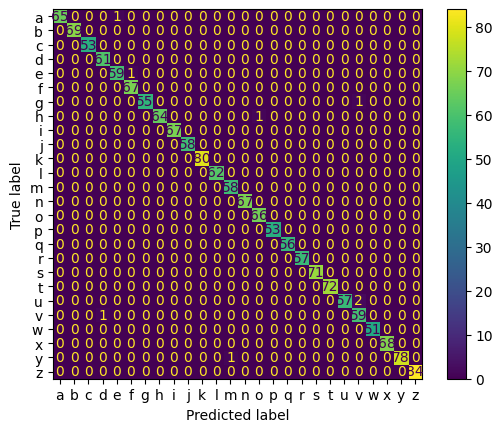

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        61
           4       0.98      0.98      0.98        60
           5       0.99      1.00      0.99        67
           6       1.00      0.98      0.99        56
           7       1.00      0.98      0.99        65
           8       1.00      1.00      1.00        67
           9       1.00      1.00      1.00        58
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        62
          12       0.98      1.00      0.99        58
          13       1.00      1.00      1.00        67
          14       0.99      1.00      0.99        66
          15       1.00      1.00      1.00        53
          16       1.00      1.00      1.00        56
          17       1.00    

In [73]:
ypredict = model.predict(x_test)
ypredict = [np.argmax(ypredicta) for ypredicta in ypredict]
cm = metrics.confusion_matrix(y_true=y_test, y_pred=ypredict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
print(cm.ravel())
cm_display.plot()
plt.show()
print(metrics.classification_report(y_true=y_test, y_pred=ypredict))